In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import collections
import time
import glob
import hashlib
import os
from google.colab.patches import cv2_imshow

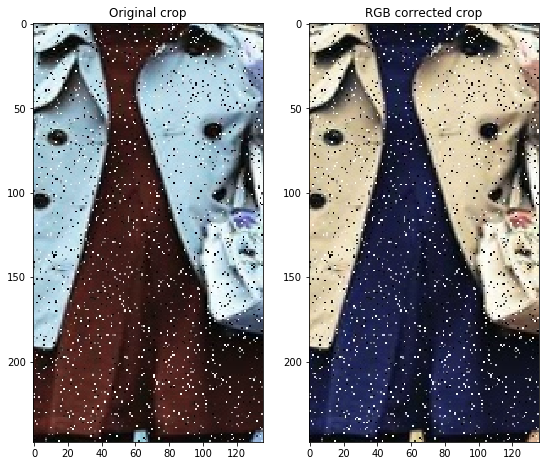

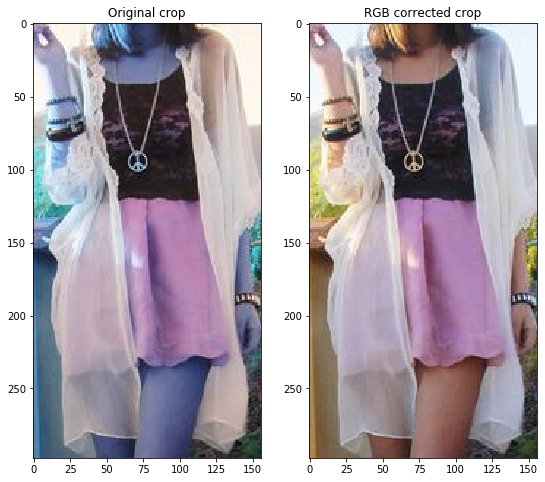

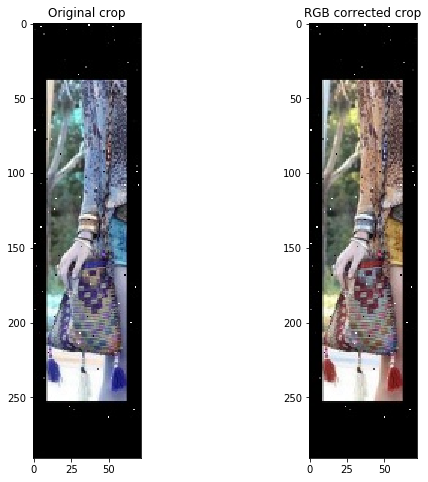

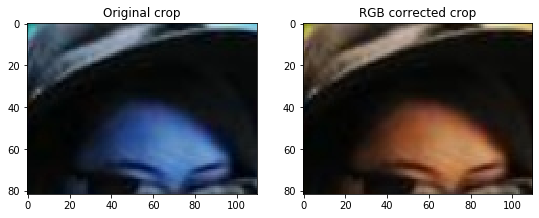

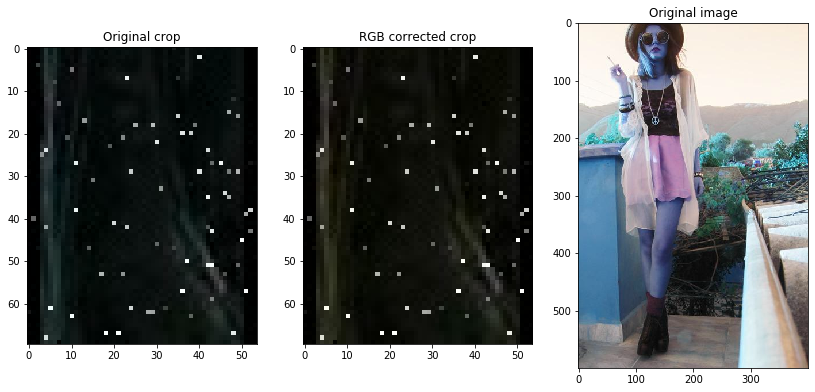

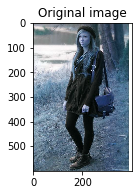

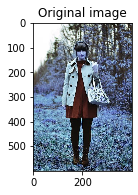

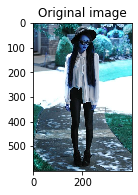

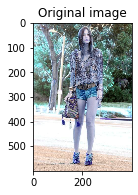

In [ ]:
crp_dir = "crops" # Enter Directory of all images 
img_dir = "images"
data_path = os.path.join(crp_dir,'*g')
data_path1 = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files1 = glob.glob(data_path1)

crp_list = []
src_list = []
for f1 in files:
    img = cv2.imread(f1)
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14,8))
    plt.subplot(131)
    plt.title("Original crop")
    plt.imshow(img)
    plt.subplot(132)
    plt.title("RGB corrected crop")
    plt.imshow(img1)
    crp_list.append(img1) 

for f2 in files1:
    src = cv2.imread(f2)
    src1 = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    plt.subplot(133)
    plt.title("Original image")
    plt.imshow(src)
    src_list.append(src1)
    plt.show()
    
        

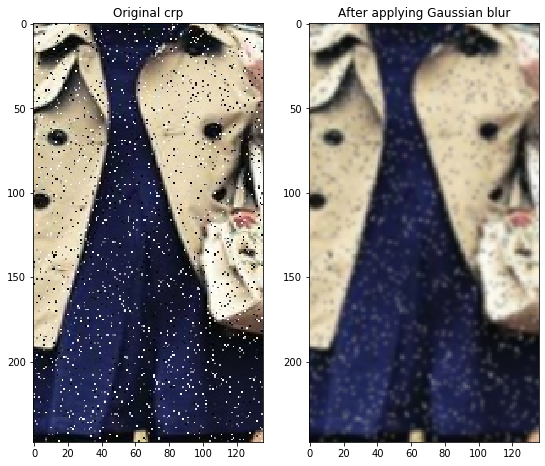

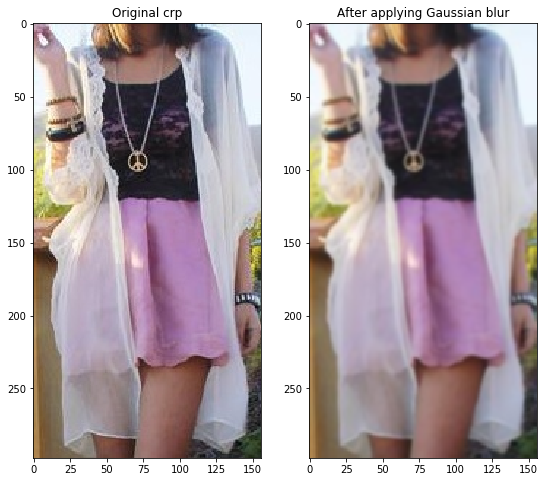

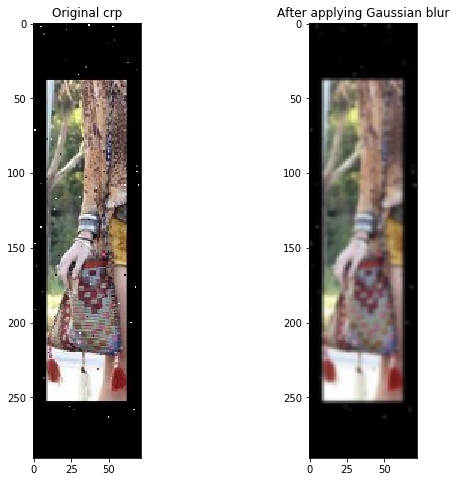

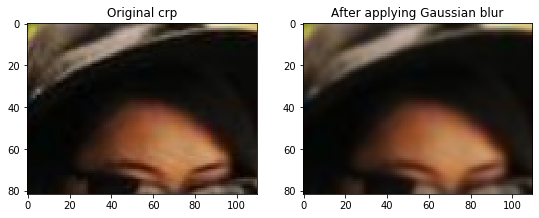

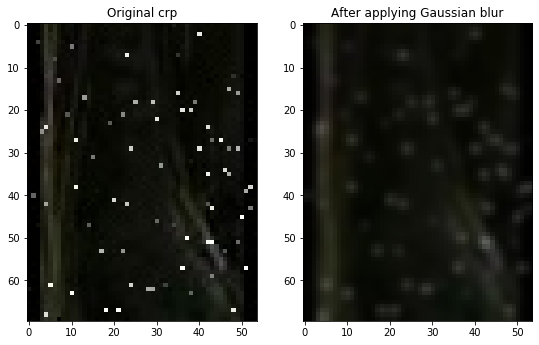

In [ ]:
crp_ef = []
for e1 in crp_list:
    crp_g = cv2.GaussianBlur(e1,(5,5),0)
    # crp_g = cv2.medianBlur(e1, 5)
    plt.figure(figsize=(14,8))
    plt.subplot(131)
    plt.title("Original crp")
    plt.imshow(e1)
    plt.subplot(132)
    plt.title("After applying Gaussian blur")
    plt.imshow(crp_g)
    crp_ef.append(crp_g)

plt.show()

Maxmimum match:  0.5233073234558105
Location of match:  (83, 179)
Maxmimum match:  0.987105131149292
Location of match:  (63, 75)
Maxmimum match:  0.4065017104148865
Location of match:  (279, 276)
Maxmimum match:  0.4565892517566681
Location of match:  (117, 465)
Maxmimum match:  0.30388087034225464
Location of match:  (287, 406)
Maxmimum match:  0.4273708164691925
Location of match:  (133, 51)
Maxmimum match:  0.2392827868461609
Location of match:  (71, 286)
Maxmimum match:  0.3225555419921875
Location of match:  (2, 27)
Maxmimum match:  0.4607635736465454
Location of match:  (202, 336)
Maxmimum match:  0.28677189350128174
Location of match:  (284, 0)
Maxmimum match:  0.6135305762290955
Location of match:  (136, 157)
Maxmimum match:  0.24485138058662415
Location of match:  (120, 273)
Maxmimum match:  0.33542606234550476
Location of match:  (115, 82)
Maxmimum match:  0.4879622757434845
Location of match:  (224, 301)
Maxmimum match:  0.3066451847553253
Location of match:  (193, 16)
Maxm

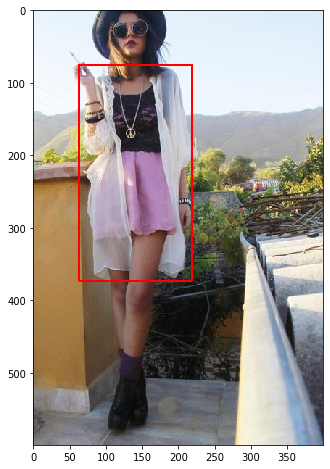

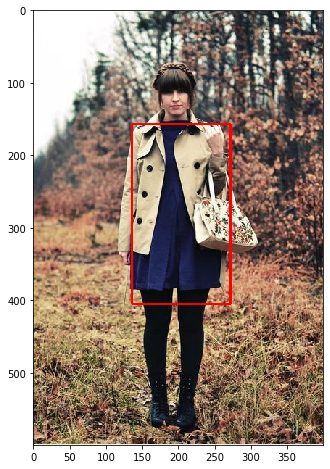

In [ ]:
result1 = []
count = 0
acc = []
tp = 0
tn = 0
fn = 0
fp = 0
for e3 in src_list:
    Accuracy_val = []
    for e2 in crp_ef:
        result = cv2.matchTemplate(e3,e2,cv2.TM_CCOEFF_NORMED)
        result1.append(result)
        _, max_val, _, max_loc = cv2.minMaxLoc(result)
        print("Maxmimum match: ",max_val)
        print("Location of match: ", max_loc)
        Accuracy_val.append(max_val)
        
        # plt.title("Resulting array")
        # plt.imshow(result,cmap='gray')
        if (max_val>=0.6):
            top_left = max_loc
            h,w = e2.shape[:2]
            bottom_right = (max_loc[0]+w , max_loc[1]+h)
            tp = tp + 1
            plt.figure(figsize=(14,8))
            cv2.rectangle(e3,top_left,bottom_right,255,2)
            plt.imshow(e3)
        elif (max_val < 40):
            fn = fn +1
        else:
            fp = fp +1

        # if (max_value <=1.0)
        #     zero_list.append()

        count = count+1
        if (count==len(crp_ef)): 
            acc.append(max(Accuracy_val))

print(acc)


        # # Initiate SIFT detector
        # orb = cv2.ORB_create()

        # # find the keypoints and descriptors with ORB
        # kp1, des1 = orb.detectAndCompute(e2,None)
        # kp2, des2 = orb.detectAndCompute(e3,None)

        # # create BFMatcher object
        # bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        # # Match descriptors.
        # matches = bf.match(des1,des2)

        # # Sort them in the order of their distance.
        # matches = sorted(matches, key = lambda x:x.distance)

        # good_matches = matches[:10]


        # src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
        # dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
        # M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        # matchesMask = mask.ravel().tolist()
        # h,w = e2.shape[:2]
        # pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

        # dst = cv2.perspectiveTransform(pts,M)
        # dst += (w, 0)  # adding offset

        # draw_params = dict(matchColor = (0,255,0), # draw matches in green color
        #               singlePointColor = None,
        #               matchesMask = matchesMask, # draw only inliers
        #               flags = 2)

        # img3 = cv2.drawMatches(e2,kp1,e3,kp2,good_matches, None,**draw_params)

        # # Draw bounding box in Red
        # img3 = cv2.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

        # cv2_imshow(img3)
        # cv2.waitKey()
        # # or another option for display output
        # #plt.imshow(img3, 'result'), plt.show() 


In [ ]:
total_acc = 0
for i in acc:
    total_acc = total_acc + i

print(total_acc/len(acc))

recall = tp/(tp+fn)
print(recall)

accuracy = tp+ tn/len(crp_ef)
print(accuracy)

# img1 = cv2.imread('crop4.jpg', 0)          # query Image
# img2 = cv2.imread('image4.jpg',0)  # target Image

# # Initiate SIFT detector
# orb = cv2.ORB_create()

# # find the keypoints and descriptors with ORB
# kp1, des1 = orb.detectAndCompute(img1,None)
# kp2, des2 = orb.detectAndCompute(img2,None)

# # create BFMatcher object
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# # Match descriptors.
# matches = bf.match(des1,des2)

# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

# good_matches = matches[:10]


# src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
# dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
# M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
# matchesMask = mask.ravel().tolist()
# h,w = img1.shape[:2]
# pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

# dst = cv2.perspectiveTransform(pts,M)
# dst += (w, 0)  # adding offset

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                singlePointColor = None,
#                matchesMask = matchesMask, # draw only inliers
#                flags = 2)

# img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None,**draw_params)

# # Draw bounding box in Red
# img3 = cv2.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

# cv2.imshow("result", img3)
# cv2.waitKey()
# # or another option for display output
# #plt.imshow(img3, 'result'), plt.show()

0.987105131149292
0.08
2.0
